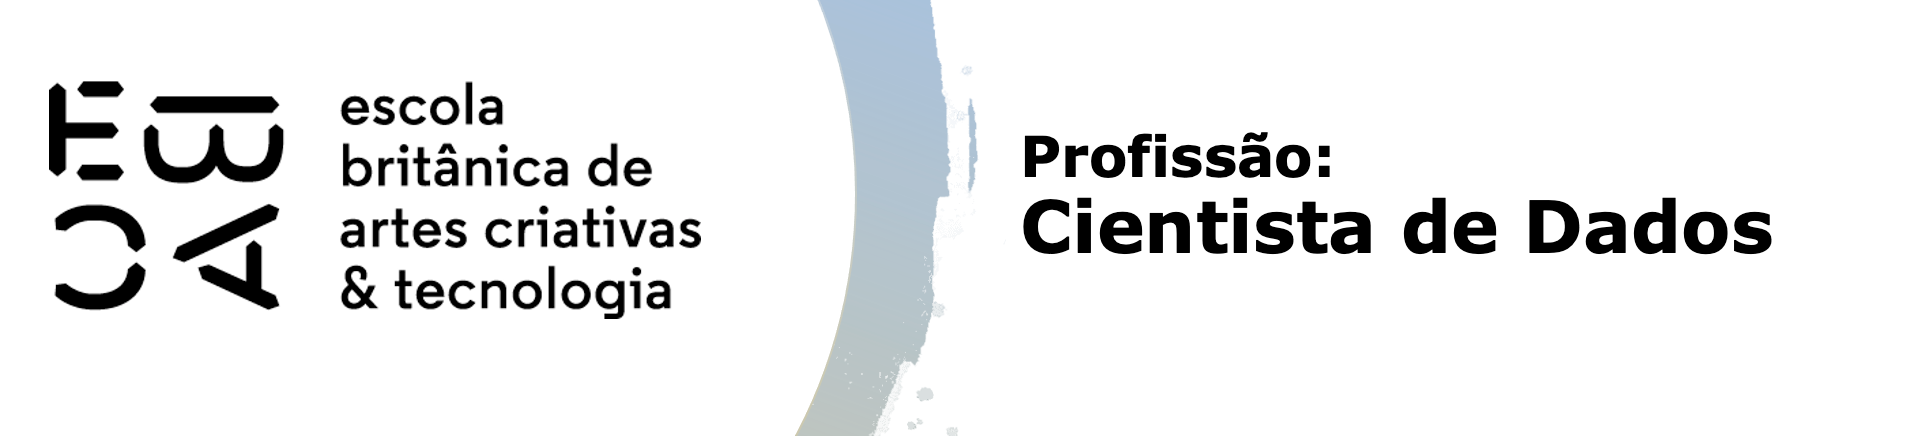

# Probabilidade - Tarefa

In [64]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

In [16]:
p_1 = stats.norm.cdf(15.2,15,0.1)

Este trecho mostra qual a probabilidade de umpocote destes ter MENOS do que 15.2kg. Ou seja, seja p_1c a probabilidade de que tenha MAIS que 15.2kg, podemos dar p_1c como sendo:

In [18]:
p_1c = 1-p_1
p_1c

0.022750131948179653

2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [30]:
p_95 = stats.norm(15, 0.1).ppf(.95)
p_95

15.164485362695148

Portanto, podemos afirmar que, dadas as condições de hipótese da distribuição normal do peso dos pacotes, 95% dos pacotes terão peso menor ou igual a 15.164kg.

3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [59]:
Y=np.linspace(-6, 6, 200)
# Seu código começa aqui
dist_tY1 = stats.t(5, 0, 1)
dist_nY2 = stats.norm(0, 1)

df_prob = pd.DataFrame(columns = ['Normal', 't-student'])

for n, c in zip(Y, range(0, len(Y))):
    df_prob.loc[c, 'Normal'] = dist_nY2.cdf(n)
    df_prob.loc[c, 't-student'] = dist_tY1.cdf(n)
df_prob

Normal t-student
0      0.0  0.000923
1      0.0  0.000966
2      0.0  0.001011
3      0.0  0.001058
4      0.0  0.001108
..     ...       ...
195    1.0  0.998892
196    1.0  0.998942
197    1.0  0.998989
198    1.0  0.999034
199    1.0  0.999077

[200 rows x 2 columns]

Ao observar nosso resultado, poderiamos facilmente pensar que há algo de errado, pelo fato de a parte normal ser nula em ambas as extremidades do df. No entanto, isso se trata na verdade de uma evidência do que já deveria ser esperado, isto é, o achatamento mais agressivo da função normal do que da função t com relação às bordas...

In [51]:
df_prob['Normal'].value_counts()


Normal
9.865876e-10    1
9.881299e-01    1
9.513707e-01    1
9.571557e-01    1
9.623715e-01    1
               ..
3.294318e-02    1
3.762853e-02    1
4.284426e-02    1
4.862933e-02    1
1.000000e+00    1
Name: count, Length: 200, dtype: int64

4. Faça uma visualização gráfica dos dados do item anterior.

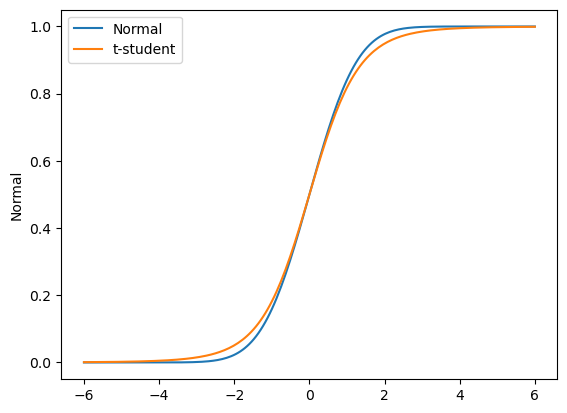

In [72]:
sns.lineplot(x=Y, y=df_prob['Normal'], label = 'Normal')
sns.lineplot(x=Y, y=df_prob['t-student'], label = 't-student')
plt.show()

Como podemos ver, a distribuição t-student decai com menos velocidade, o que explica o porque seus valores não se tornam identicamente nulos dentro do intervalo avaliado, enquanto a normal, por sua vez, já se torna.

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [77]:
Y_ex2 =np.linspace(0, 1, 20)
# Seu código começa aqui


In [79]:
df_prob2 = pd.DataFrame(columns=['Normal', 't-student'])
for n, c in zip(Y_ex2, range(0,len(Y_ex2))):
    df_prob2.loc[c, 'Normal'] = dist_nY2.ppf(n)
    df_prob2.loc[c, 't-student'] = dist_tY1.ppf(n)
df_prob2

Normal t-student
0       -inf      -inf
1  -1.619856 -1.974893
2   -1.25212 -1.435859
3  -1.003148 -1.114396
4  -0.804596 -0.876124
5   -0.63364 -0.680672
6  -0.479506 -0.510277
7  -0.336038 -0.355328
8  -0.199201 -0.209799
9  -0.066012 -0.069391
10  0.066012  0.069391
11  0.199201  0.209799
12  0.336038  0.355328
13  0.479506  0.510277
14   0.63364  0.680672
15  0.804596  0.876124
16  1.003148  1.114396
17   1.25212  1.435859
18  1.619856  1.974893
19       inf       inf

6. Faça um gráfico com os dados do item anterior.

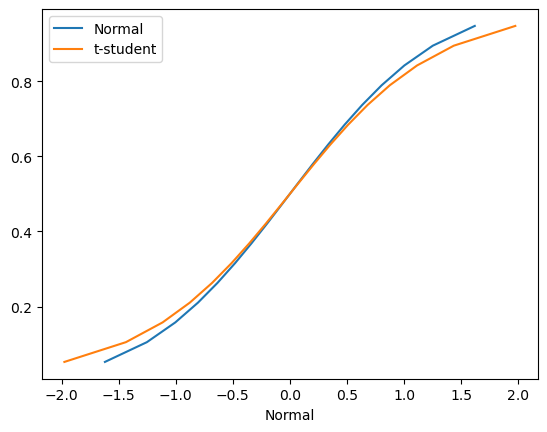

In [87]:
sns.lineplot(y=Y_ex2, x=df_prob2['Normal'], label = 'Normal')
sns.lineplot(y=Y_ex2, x=df_prob2['t-student'], label='t-student')
plt.show()

Semelhante aos resultados que já haviamos adquirido, notamos que a distribuição t-student deixa de ser identicamente nula mais cedo, confirmando as afirmações que já haviamos feito anteriormente embasadas pela teoria.